IMPORT AND SET UP

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# import data

df = pd.read_csv('911.csv')

BASIC EXPLORATORY DATA

In [35]:
# info of the data
# from info, we can see that there are 9 columns and almost 100

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [36]:
# twp = township

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [37]:
# let's find out the top 5 zipcode for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [38]:
# let's find out the top 5 townships (twp) for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [39]:
# unique count of title 

df['title'].nunique()

110

BASIC FEATURE ENGINEERING

In [40]:
# new feature - reason of 911 calls from title column (before ':')

df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [41]:
# let's see the count for each reason of 911 calls

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

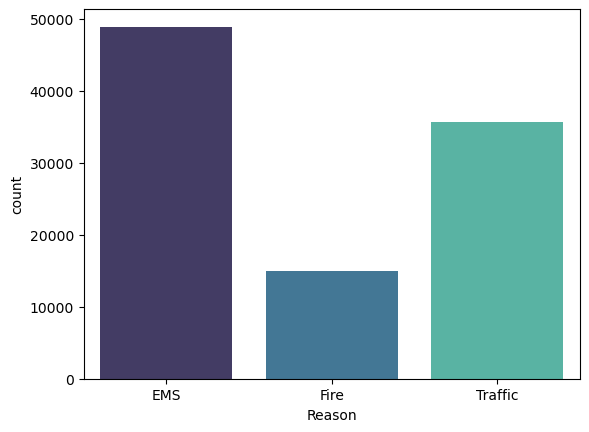

In [42]:
# plotting of the reason 

sns.countplot(x='Reason', data=df, palette='mako')

In [43]:
# let's focus on the time information

In [44]:
# datatype of the time column
type(df['timeStamp'][0])

str

In [45]:
# the time information is in form of string
# so let's convert it into the datetime object

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [46]:
# get the hour, month, day of week from timeStamp

df['hour'] = df['timeStamp'].apply(lambda timestamp : timestamp.hour)
df['month'] = df['timeStamp'].apply(lambda timestamp : timestamp.month)
df['dayofweek'] = df['timeStamp'].apply(lambda timestamp : timestamp.dayofweek)

print('timestamp : ', df['timeStamp'][0], '\nhour : ', df['hour'][0])
print('month : ', df['month'][0])
print('day of week : ', df['dayofweek'][0])

timestamp :  2015-12-10 17:40:00 
hour :  17
month :  12
day of week :  3


In [47]:
# day of week is in the form of integer, 0-6

df['dayofweek'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [48]:
# let's map this integer into the correct day

dmap = {0:'Mon',
        1:'Tue',
        2:'Wed', 
        3:'Thu',
        4:'Fri',
        5:'Sat',
        6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

In [49]:
df['dayofweek'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

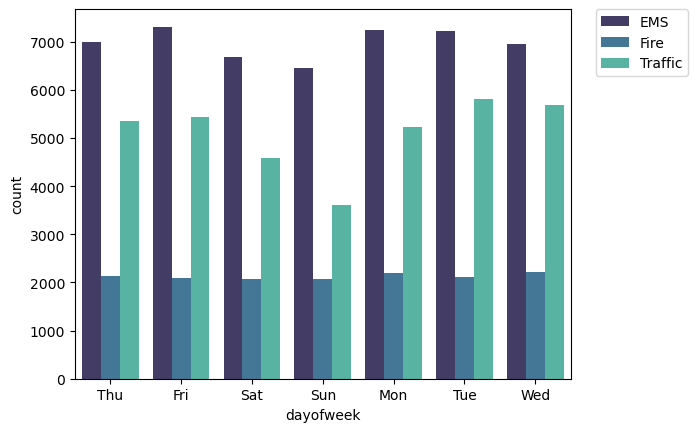

In [50]:
# plotting the 911 calls by Day of Week and Reason

sns.countplot(x='dayofweek', data=df, hue='Reason', palette='mako')

# relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

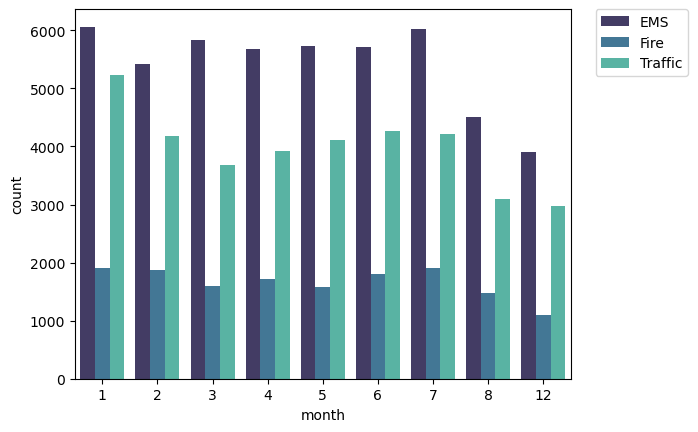

In [51]:
# plotting the 911 calls by Month and Reason

sns.countplot(x='month', data=df, hue='Reason', palette='mako')

# relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [52]:
# from the above plot, we can see that there are missing months, Sept, Oct and Nov
# so, we create line plot to see the trend more clearly

<AxesSubplot:xlabel='month'>

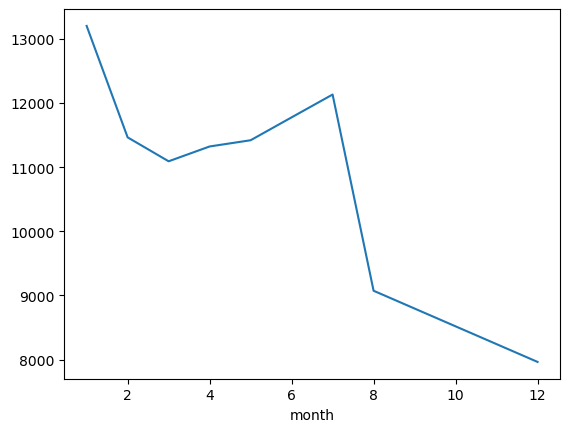

In [53]:
bymonth = df.groupby('month').count()['twp']
bymonth.plot()

In [ ]:
# from the line plot, we can see that there is a drop trend from Oct to Dec

In [54]:
# create date column 

df['date'] = df['timeStamp'].apply(lambda timestamp : timestamp.date())
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

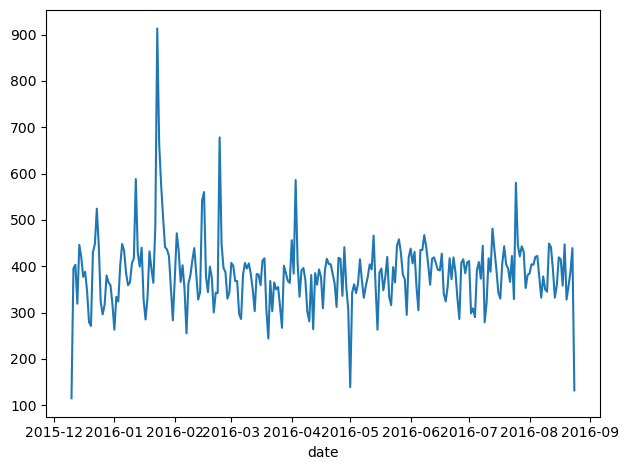

In [64]:
# time series of 911 calls

df.groupby('date').count()['twp'].plot()
plt.tight_layout()

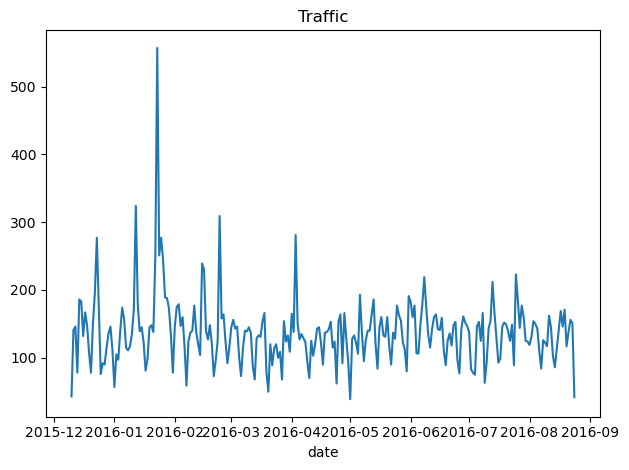

In [69]:
# time series of 911 calls by Reason=Traffic

df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

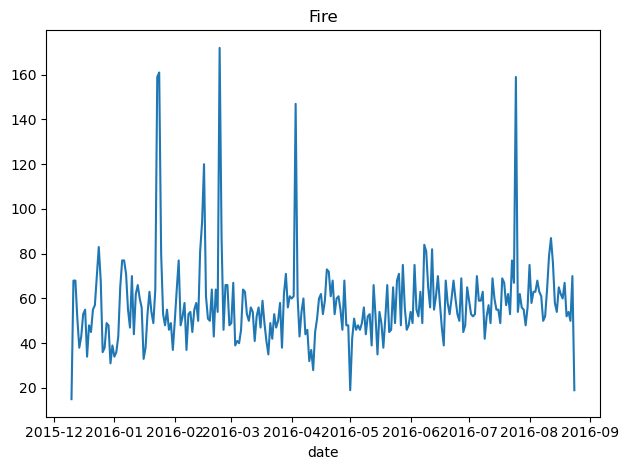

In [70]:
# time series of 911 calls by Reason=Fire

df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

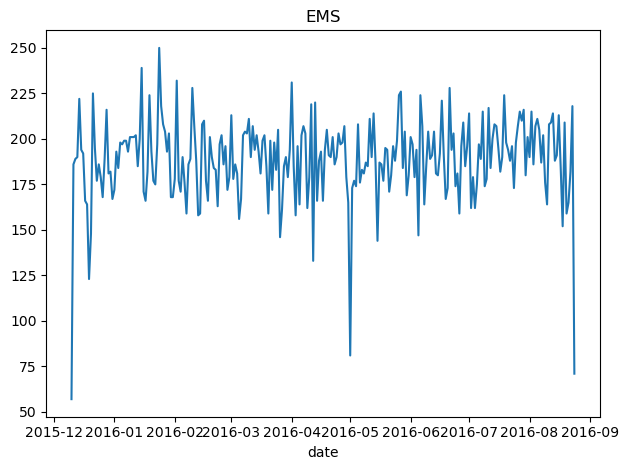

In [71]:
# time series of 911 calls by Reason=Fire

df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [58]:
# restructure the data for heatmap plotting - day of week & hour

dayHour = df.groupby(by=['dayofweek','hour']).count()['Reason'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

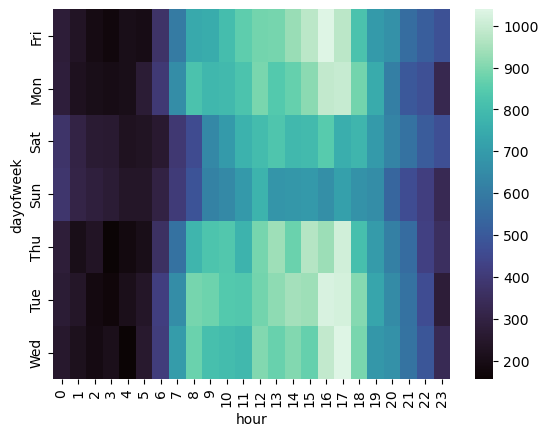

In [73]:
# heatmap (day of week & hour)

# from the below heatmap, we can see that 911 calls mostly occur at evening, 4pm-5pm 
# and less likely to occur on Saturday and Sunday

sns.heatmap(dayHour, cmap='mako')

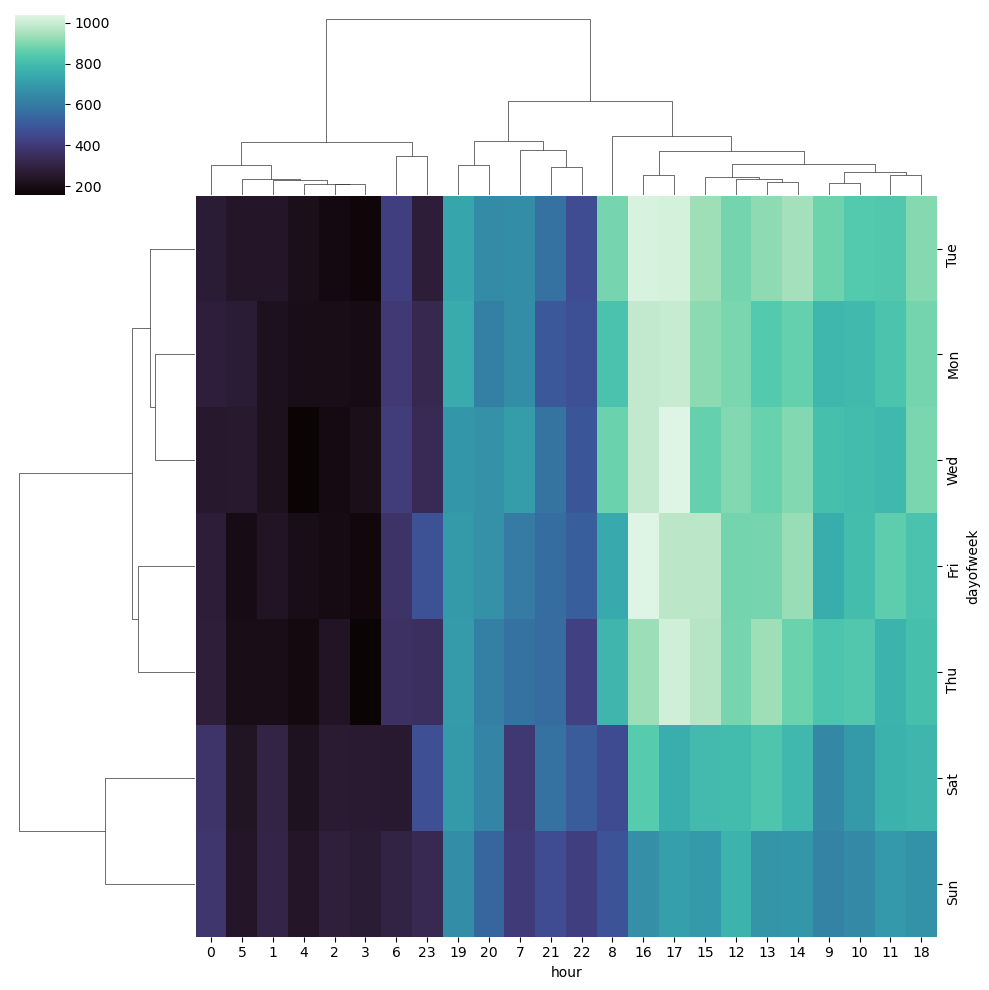

In [60]:
# clustermap (day of week & hour)

sns.clustermap(dayHour, cmap='mako')

In [61]:
# restructure the data for heatmap plotting - day of week and month

dayMonth = df.groupby(by=['dayofweek','month']).count()['Reason'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='month', ylabel='dayofweek'>

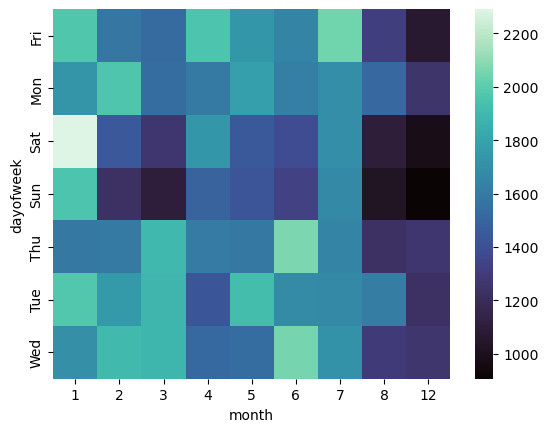

In [62]:
# heatmap (day of week & month)

sns.heatmap(dayMonth, cmap='mako')

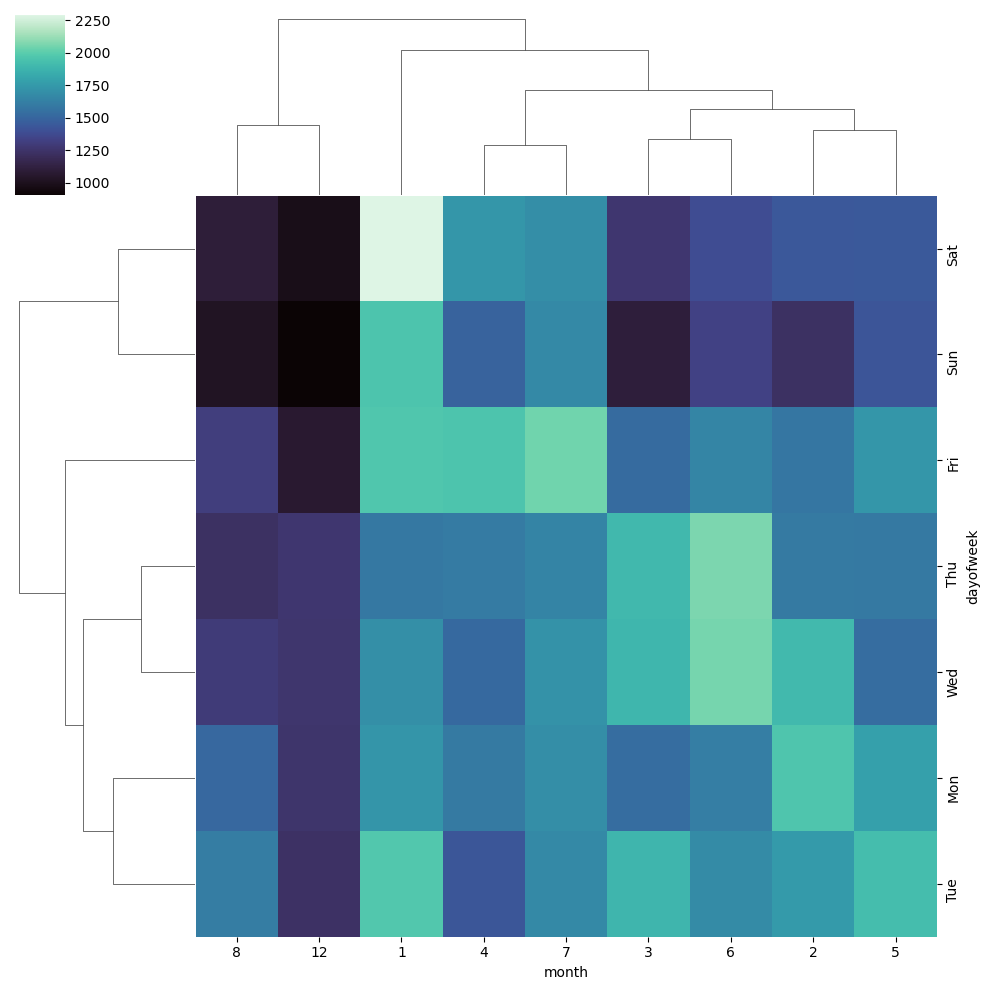

In [63]:
# clustermap (day of week & hour)

sns.clustermap(dayMonth, cmap='mako')